This code will be used to generate a sampling of n pentagons from the moduli space of pentagons with side lengths 0\neq (d_1,d_2,d_3,d_4,d_5)\in R^5. Without loss of generality we can assume that d_1=1 because the moduli space for (d_1,d_2,d_3,d_4,d_5) is the same as the moduli space for (d_1/d_1=1,d_2/d_1,d_3/d_1,d_4/d_1,d_5/d_1). In essence, for any pentagon with no side lengths equal to 1, we can scale all of the side lengths so that one side length is equal to 1 and the pentagons are geometrically the same.

In [17]:
import numpy as np
import math

class InternalException(Exception):
    "Internal Function Error"

def len_side(a, b, C):#law of cosines for sides a,b and angle C
    c_sq = a ** 2 + b ** 2 - 2 * a * b * math.cos(C)
    c = math.sqrt(c_sq)
    return c

def angle_from_side(a, b, c):#law of cosines for sides a,b,c returning angle C
    
    cos_c = (a **2 + b ** 2 - c ** 2)/(2*a*b)
    C = math.acos(cos_c)
    return C

def get_intersections(x0, y0, r0, x1, y1, r1):#find intersection points of two circles
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    #change the following nones to be more descriptive
    
    # non intersecting
    if d > r0 + r1 :
        return None
    # One circle within other
    if d < abs(r0-r1):
        return None
    # coincident circles
    if d == 0 and r0 == r1:
        return None
    else:
        a=(r0**2-r1**2+d**2)/(2*d)
        h=math.sqrt(r0**2-a**2)
        x2=x0+a*(x1-x0)/d   
        y2=y0+a*(y1-y0)/d   
        x3=x2+h*(y1-y0)/d     
        y3=y2-h*(x1-x0)/d 

        x4=x2-h*(y1-y0)/d
        y4=y2+h*(x1-x0)/d
        
        return [[x3, y3], [x4, y4]]
    
def max_sum_angle(dist, start_ang): #Take in the distances of our pentagon
    if start_ang >= (math.pi)/2:
        raise InternalException("Input new angle")
    else:
        c = dist[1] + dist[2]
        b = len_side(c, dist[0], start_ang)
        beta = angle_from_side(b, dist[0], c)
        alpha = angle_from_side(1, dist[3], b) #weirdness when we consider 1, 1, b?
        gamma = angle_from_side(1, b, dist[3])
        
        return alpha + beta + gamma
    

    
#first we define a function which takes theta1,theta2,(d_2,d_3,d_4,d_5) assuming d_1=1 and outputs a list [(a,b),...]
#of length 5 with each entry a tuple with coordinates for a vertex of the pentagon
    
def pentagon(theta1, theta2, distances):
    if sum(distances)<1:
        raise InternalException('Distances too small to make a valid pentagon.')
        
    output=[]
    w2=[1-distances[0]*np.cos(theta2),distances[0]*np.sin(theta2)]
    
    b=len_side(distances[3],1,theta1)
    thetapp=theta2-angle_from_side(b,1,distances[3])
    c=len_side(b,distances[0],thetapp)#used law of cosines x3 to find c=distance between w2,w4
    
    w4=[distances[3]*np.cos(theta1),distances[3]*np.sin(theta1)]
    w3s=get_intersections(w2[0],w2[1],distances[1],w4[0],w4[1],distances[2])
    
    if c>distances[1]+distances[2]: #view dist[1] and dist[2] as the radii of circles centered at vertices
        raise InternalException('Angles and distances cannot form a valid pentagon.')
    
    if w3s is None:
        raise InternalException('Could not calculate circle intersection')
    
    
    if w3s[0]!=w3s[1]:#if w3s[0] does not equal w3s[1] then the circle has two intersection points and there are two valid pentagons
        p1=[[0,0],[1,0],w2]#append w0,w1,w2
        p1.append(w3s[0])#append w3
        p1.append(w4)#append w4
        output.append(p1)
        p2=[[0,0],[1,0],w2]#append w0,w1,w2
        p2.append(w3s[1])#append w3
        p2.append(w4)#append w4
        output.append(p2)
        p3=[[0,0],[1,0],[w2[0],-1*w2[1]],[w3s[0][0],-1*w3s[0][1]],[w4[0],-1*w4[1]]]
        p4=[[0,0],[1,0],[w2[0],-1*w2[1]],[w3s[1][0],-1*w3s[1][1]],[w4[0],-1*w4[1]]]
        output.append(p3)
        output.append(p4)
    else:
        p1=[[0,0],[1,0],w2]#append w0,w1,w2
        p1.append(w3s[0])#append w3
        p1.append(w4)#append w4
        output.append(p1)
        p2=[[0,0],[1,0],[w2[0],-1*w2[1]],[w3s[0][0],-1*w3s[0][1]],[w4[0],-1*w4[1]]]
        output.append(p2)
    
    return np.array(output, dtype=object) #this returns a list 2-4 pentagons, each in numpy array form

p=pentagon(6,1/4,[1,1,1,1])

In [27]:
p.shape
max_sum_angle([1,1,1,1], (math.pi)/3)

4.1887902047863905

In [26]:
p
max_sum_angle([1,1,1,1], (-math.pi)/3)

4.1887902047863905

In [38]:
np.linalg.norm(p[1][4]-p[1][0])

1.0

[[0 0]
 [1 0]
 [0.031087578289355267 0.24740395925452294]
 [0.07859916817497431 -0.7514667274845268]
 [0.9601702866503661 -0.27941549819892586]]


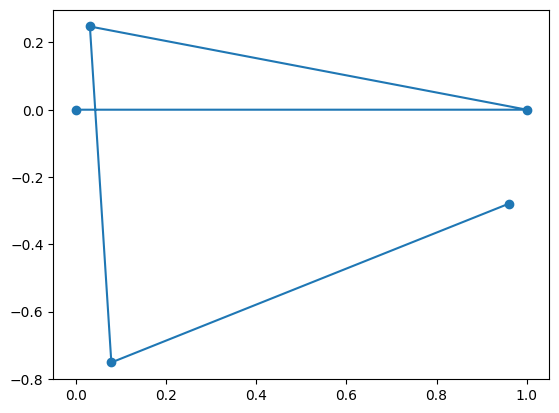

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
data=p[0]
#plt.rcParams["figure.figsize"] = [4.0, 3.50]
plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1])
print(data)
plt.show()

This next function takes n,(d_2,d_3,d_4,d_5) as an argument and outputs a list of around 2n randomly generated pentagons with side lengths (d_2,d_3,d_4,d_5).

In [18]:


def moduli_space_sample(n, distances, start_ang):
    if sum(distances)<1:
        raise Exception('Distances too small to make a valid pentagon.')
    
    sample=[]
    for i in range(n):
        while True:
            theta1=np.random.uniform(0,max_sum_angle(distances, start_ang),1)
            theta2=np.random.uniform(0,max_sum_angle(distances, start_ang)-theta1,1)
            try:
                p=pentagon(theta1,theta2,distances)
                for j in p:
                    sample.append(j)
                break
            except InternalException as e:
                print(str(e))
                continue
    return sample

r=moduli_space_sample(1,[1,1,1,1], (math.pi/3))
len(r)
r

[array([[0, 0],
        [1, 0],
        [array([1.55543565]), array([0.83155952])],
        [array([0.97779502]), array([1.64785071])],
        [array([0.24244267]), array([0.97016574])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.55543565]), array([0.83155952])],
        [array([0.8200833]), array([0.15387455])],
        [array([0.24244267]), array([0.97016574])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.55543565]), array([-0.83155952])],
        [array([0.97779502]), array([-1.64785071])],
        [array([0.24244267]), array([-0.97016574])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.55543565]), array([-0.83155952])],
        [array([0.8200833]), array([-0.15387455])],
        [array([0.24244267]), array([-0.97016574])]], dtype=object)]

In [21]:
r=moduli_space_sample(3,[1,1,1,2], (math.pi/4))
len(r)
r

Angles and distances cannot form a valid pentagon.
Could not calculate circle intersection
Could not calculate circle intersection
Angles and distances cannot form a valid pentagon.
Could not calculate circle intersection


[array([[0, 0],
        [1, 0],
        [array([1.43319778]), array([0.90129889])],
        [array([1.21255893]), array([1.87665446])],
        [array([0.21877697]), array([1.98799815])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.43319778]), array([0.90129889])],
        [array([0.43941582]), array([1.01264257])],
        [array([0.21877697]), array([1.98799815])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.66741581]), array([0.74468526])],
        [array([2.29536124]), array([1.52294263])],
        [array([1.29536163]), array([1.52382356])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.66741581]), array([0.74468526])],
        [array([0.66741619]), array([0.74556619])],
        [array([1.29536163]), array([1.52382356])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.76930525]), array([0.63888139])],
        [array([2.56730445]), array([0.03622288])],
        [array([1.85772531]), array([0.74084863]

In [19]:
r=moduli_space_sample(3,[1,1,1,2], (math.pi/5))
len(r)
r

Angles and distances cannot form a valid pentagon.
Angles and distances cannot form a valid pentagon.


[array([[0, 0],
        [1, 0],
        [array([1.90739426]), array([0.42028045])],
        [array([2.7549488]), array([0.95098875])],
        [array([1.7549824]), array([0.95918548])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.90739426]), array([0.42028045])],
        [array([0.90742785]), array([0.42847718])],
        [array([1.7549824]), array([0.95918548])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.90739426]), array([-0.42028045])],
        [array([2.7549488]), array([-0.95098875])],
        [array([1.7549824]), array([-0.95918548])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.90739426]), array([-0.42028045])],
        [array([0.90742785]), array([-0.42847718])],
        [array([1.7549824]), array([-0.95918548])]], dtype=object),
 array([[0, 0],
        [1, 0],
        [array([1.56786006]), array([0.82312511])],
        [array([1.00402712]), array([-0.00276375])],
        [array([1.99633409]), array([0.12103803

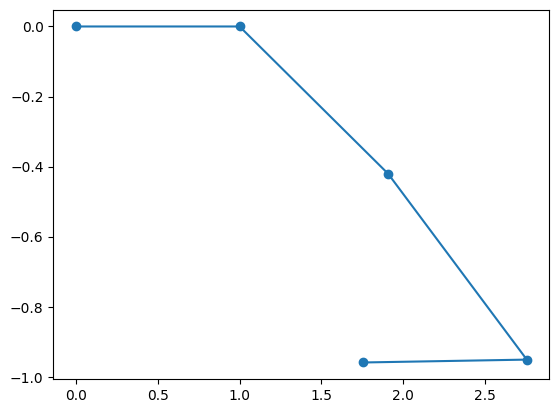

In [26]:
data=r[2]
#plt.rcParams["figure.figsize"] = [4.0, 3.50]
plt.scatter(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1])
plt.show()